# https://www.kaggle.com/competitions/playground-series-s3e24/overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Reading train and test files
traindf = pd.read_csv("/Users/ananya/Desktop/RPI ML/Project/Data/train.csv")
testdf = pd.read_csv("/Users/ananya/Desktop/RPI ML/Project/Data/test.csv")

In [3]:
traindf.head(10)
#checking overview of train data

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   
5   5   50         170          55       51.0             1.2   
6   6   45         160          55       69.0             1.5   
7   7   55         155          60       84.5             0.7   
8   8   40         165          70       89.0             0.7   
9   9   40         155          50       73.0             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0              0.6              1               1       135          87   
1              0.7              2               2       146          83   
2              0.5              1               1       118          75   
3              1.2              1               1       131          88   
4              1.0              1               1       121          76   
5              1.2              1               1       146          95   
6              1.2              1               1       150          88   
7              0.9              1               1       137          91   
8              1.0              1               1       130          80   
9              1.5              1               1       105          70   

   fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
0                   94          172           300   40   75        16.5   
1                  147          194            55   57  126        16.2   
2                   79          178           197   45   93        17.4   
3                   91          180           203   38  102        15.9   
4                   91          155            87   44   93        15.4   
5                  101          199           343   31   99        15.9   
6                   84          222           153   69  122        13.0   
7                  100          282           165   51  198        14.5   
8                  104          243           163   59  150        15.7   
9                   64          183            27   55  122        13.2   

   Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  smoking  
0              1               1.0   22   25   27              0        1  
1              1               1.1   27   23   37              1        0  
2              1               0.8   27   31   53              0        1  
3              1               1.0   20   27   30              1        0  
4              1               0.8   19   13   17              0        1  
5              1               0.7   24   42  119              1        1  
6              1               0.7   17   12   16              0        0  
7              1               0.7   16   15   16              0        0  
8              1               0.9   24   21   31              0        1  
9              1               0.7   22   16   14              0        0

<Axes: >

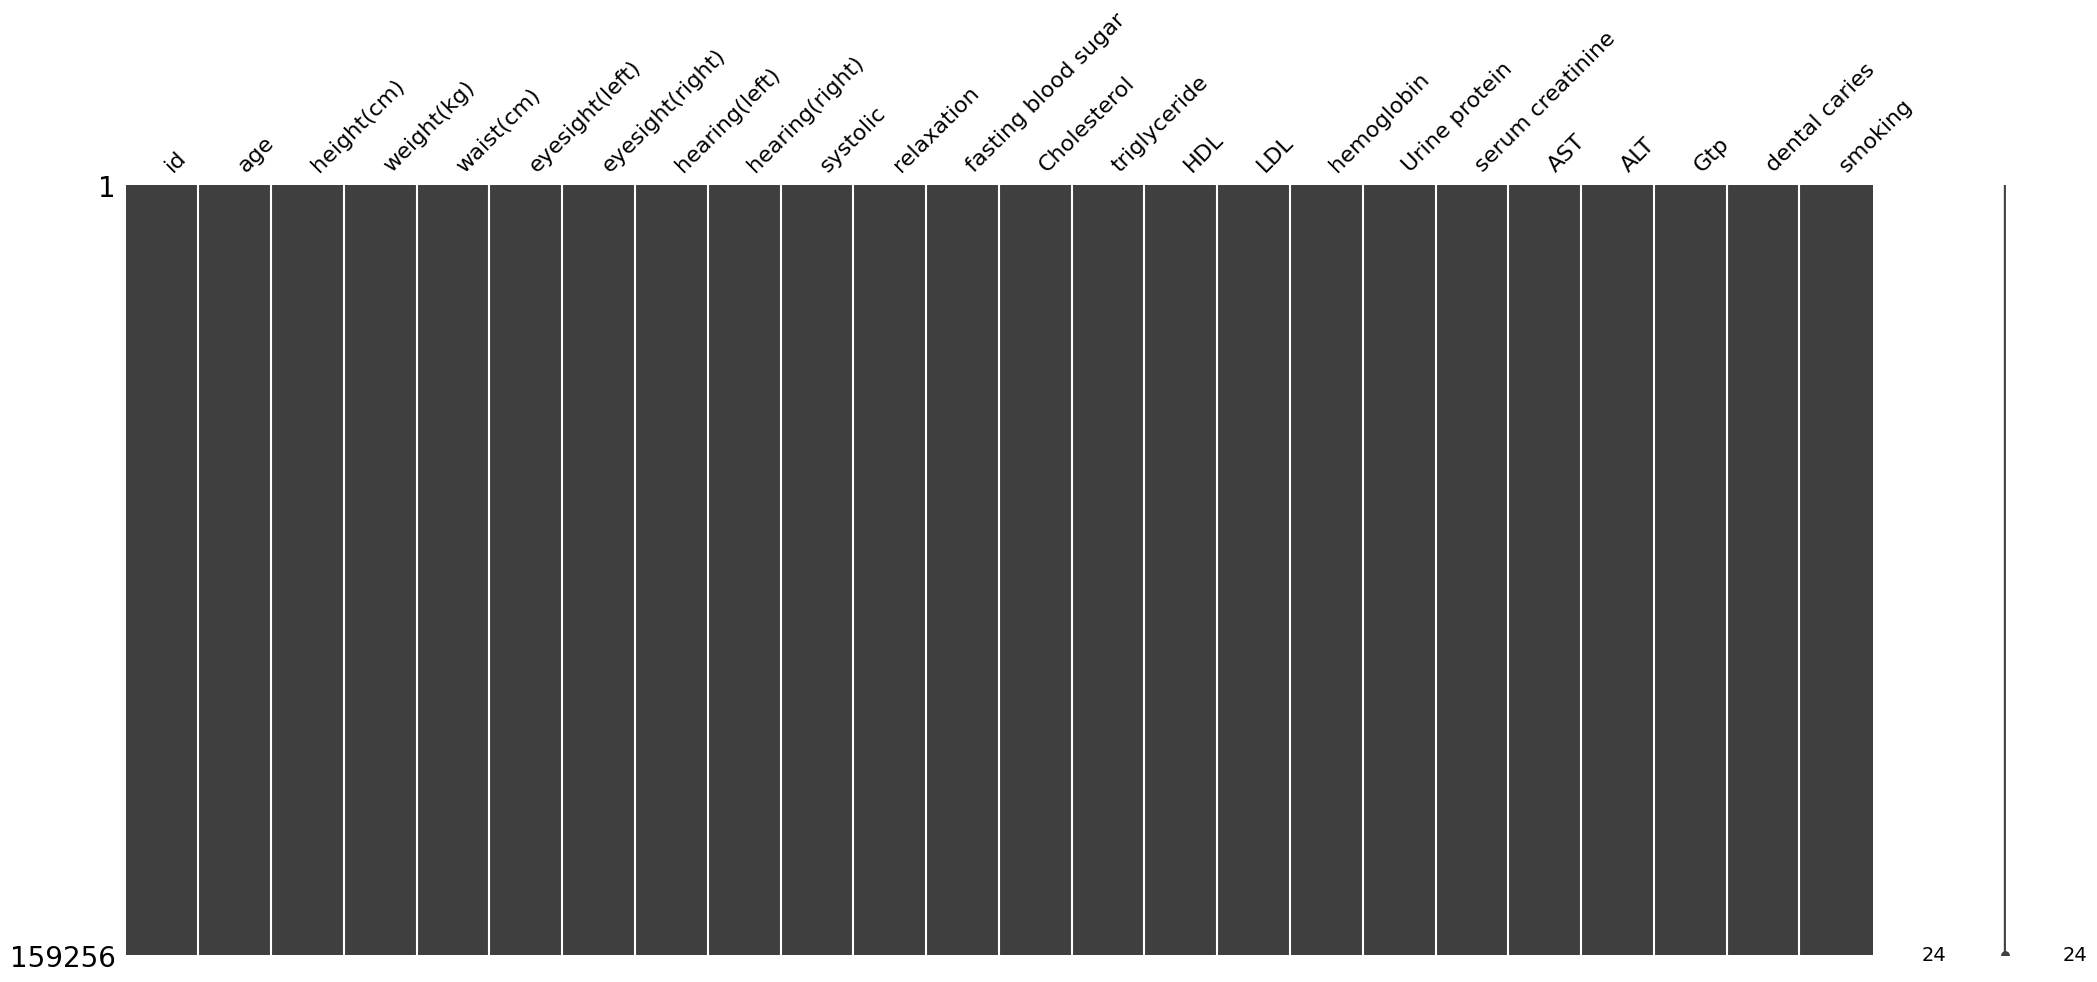

In [4]:
msno.matrix(traindf)

In [5]:
#Checking missing values and duplicates since the above graph says no NA values are there for train df
print(traindf.isnull().sum().sum())
print(testdf.isnull().sum().sum())
print(traindf.duplicated().sum())
print(testdf.duplicated().sum())

0
0
0
0


In [6]:
from sklearn.model_selection import train_test_split
# Stratified Sampling
df, _ = train_test_split(traindf, train_size=0.13, stratify=traindf['smoking'], random_state=40)
print(len(df))

20703


In [7]:
df.info() #sampled dataa information

<class 'pandas.core.frame.DataFrame'>
Index: 20703 entries, 105607 to 34263
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20703 non-null  int64  
 1   age                  20703 non-null  int64  
 2   height(cm)           20703 non-null  int64  
 3   weight(kg)           20703 non-null  int64  
 4   waist(cm)            20703 non-null  float64
 5   eyesight(left)       20703 non-null  float64
 6   eyesight(right)      20703 non-null  float64
 7   hearing(left)        20703 non-null  int64  
 8   hearing(right)       20703 non-null  int64  
 9   systolic             20703 non-null  int64  
 10  relaxation           20703 non-null  int64  
 11  fasting blood sugar  20703 non-null  int64  
 12  Cholesterol          20703 non-null  int64  
 13  triglyceride         20703 non-null  int64  
 14  HDL                  20703 non-null  int64  
 15  LDL                  20703 non-null 

In [8]:
df.describe().T

count          mean           std    min      25%  \
id                   20703.0  79992.953678  45991.026030    4.0  40121.5   
age                  20703.0     44.361204     11.828478   20.0     40.0   
height(cm)           20703.0    165.337632      8.799525  135.0    160.0   
weight(kg)           20703.0     67.125054     12.519781   30.0     60.0   
waist(cm)            20703.0     82.995537      8.915482   57.0     77.0   
eyesight(left)       20703.0      1.004333      0.369564    0.1      0.8   
eyesight(right)      20703.0      1.000647      0.373639    0.1      0.8   
hearing(left)        20703.0      1.023282      0.150800    1.0      1.0   
hearing(right)       20703.0      1.025600      0.157943    1.0      1.0   
systolic             20703.0    122.471188     12.684425   81.0    114.0   
relaxation           20703.0     76.889388      9.025835   44.0     70.0   
fasting blood sugar  20703.0     98.463556     15.930029   46.0     90.0   
Cholesterol          20703.0    195.508139     28.321524  100.0    175.0   
triglyceride         20703.0    127.655509     66.212247    8.0     77.0   
HDL                  20703.0     55.798677     13.955466   23.0     45.0   
LDL                  20703.0    114.310825     27.112073   10.0     95.0   
hemoglobin           20703.0     14.809709      1.420698    6.6     13.8   
Urine protein        20703.0      1.072598      0.343444    1.0      1.0   
serum creatinine     20703.0      0.892397      0.176745    0.1      0.8   
AST                  20703.0     25.532870      8.619282    9.0     20.0   
ALT                  20703.0     26.629039     15.341564    4.0     16.0   
Gtp                  20703.0     36.405690     32.377581    5.0     18.0   
dental caries        20703.0      0.196445      0.397318    0.0      0.0   
smoking              20703.0      0.437376      0.496075    0.0      0.0   

                         50%       75%       max  
id                   80446.0  119491.5  159249.0  
age                     40.0      55.0      85.0  
height(cm)             165.0     170.0     190.0  
weight(kg)              65.0      75.0     125.0  
waist(cm)               83.0      89.0     125.8  
eyesight(left)           1.0       1.2       9.9  
eyesight(right)          1.0       1.2       9.9  
hearing(left)            1.0       1.0       2.0  
hearing(right)           1.0       1.0       2.0  
systolic               121.0     130.0     199.0  
relaxation              78.0      82.0     120.0  
fasting blood sugar     96.0     103.0     375.0  
Cholesterol            196.0     217.0     347.0  
triglyceride           115.0     164.0     548.0  
HDL                     53.0      64.0     133.0  
LDL                    114.0     133.0    1220.0  
hemoglobin              15.0      15.8      19.1  
Urine protein            1.0       1.0       6.0  
serum creatinine         0.9       1.0       3.4  
AST                     24.0      29.0     180.0  
ALT                     22.0      33.0     217.0  
Gtp                     27.0      44.0     836.0  
dental caries            0.0       0.0       1.0  
smoking                  0.0       1.0       1.0

- The participants range from 20 to 85 years, with an average age of about 44 years.
- The average height is approximately 165 cm, and the average weight is around 67 kg.
- The average waist circumference is about 83 cm.
- The average values are close to 1, indicating generally normal eyesight and hearing.
- The average systolic blood pressure is around 122 mmHg.
- The target variable, with approximately 43% of the participants being smokers, which aligns with the full dataset.

## Exploratory Data Analysis

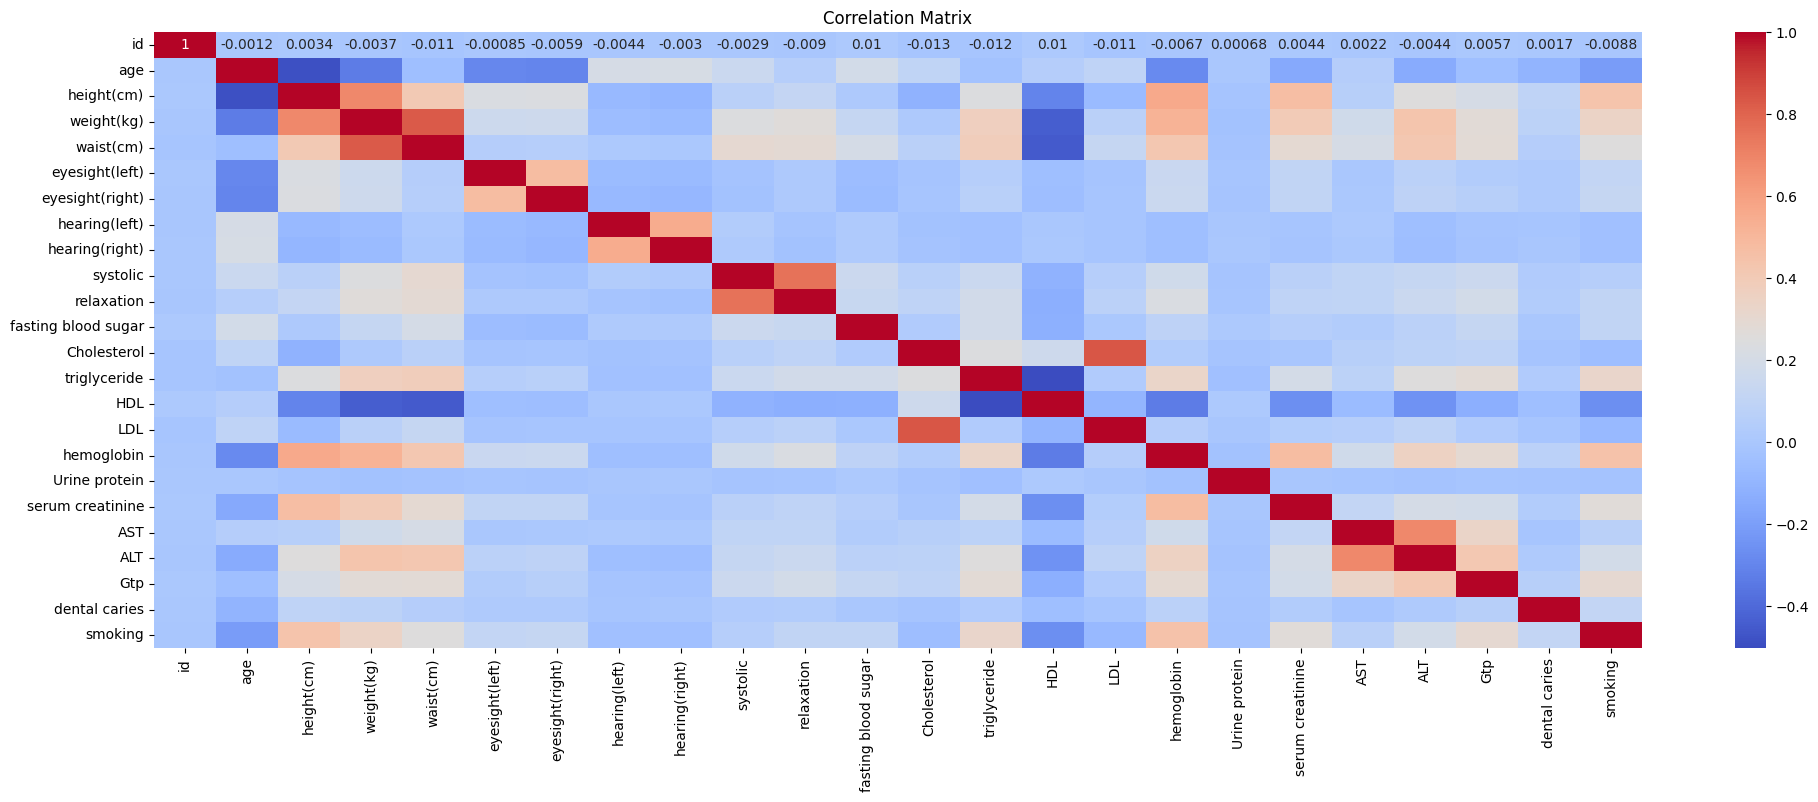

In [9]:
# Correlation analysis with heatmap
corr = df.corr()
plt.figure(figsize=(24, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',xticklabels=True, yticklabels=True)
plt.title('Correlation Matrix')
plt.show()


- The correlation heatmap indicates a weak relationship between the feature, target variable, and smoking, implying that multiple features will be necessary for reliable prediction.
- Certain features, like weight and waist circumference, exhibit a strong correlation.


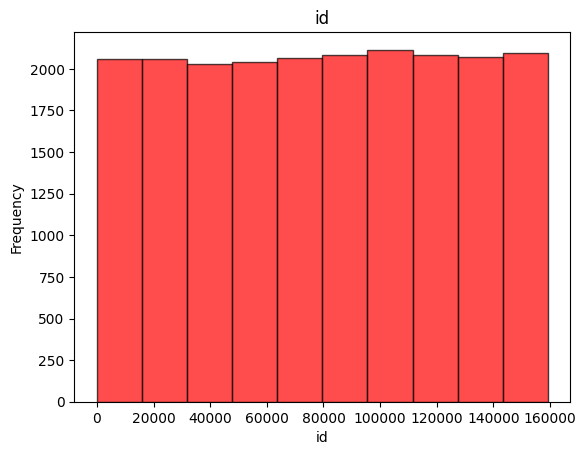

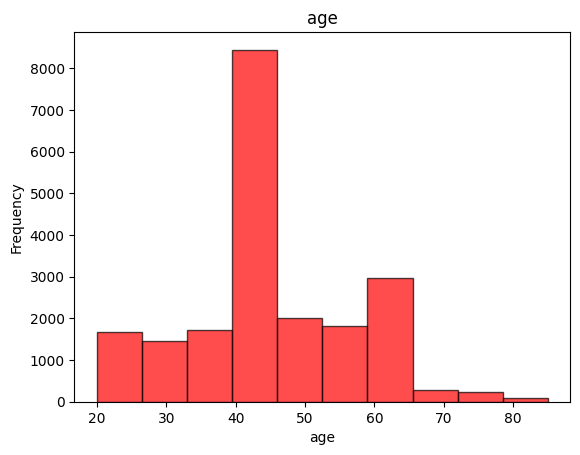

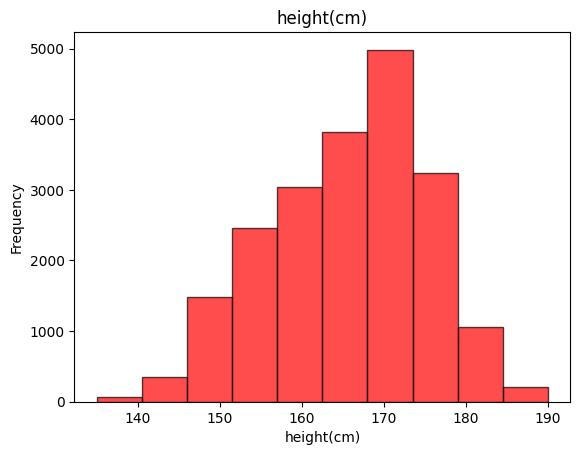

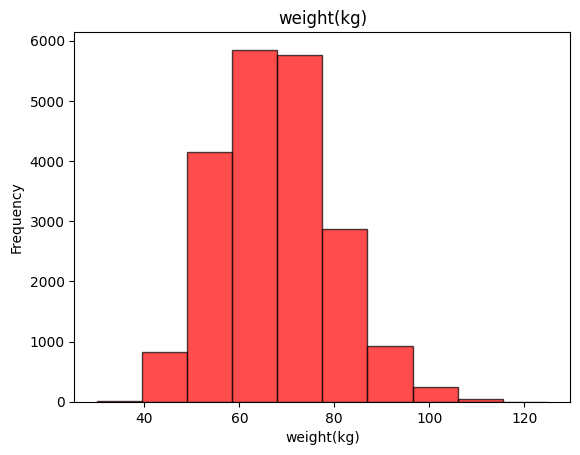

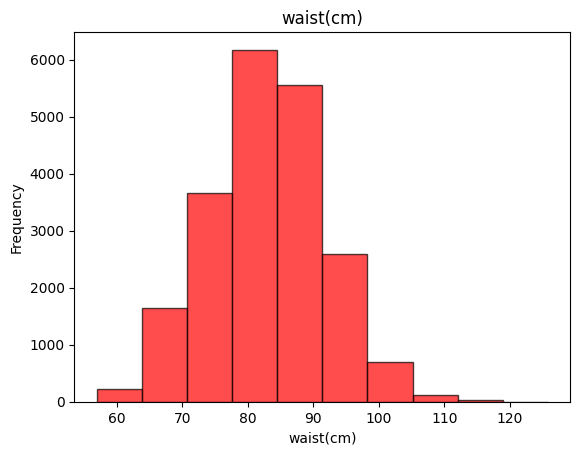

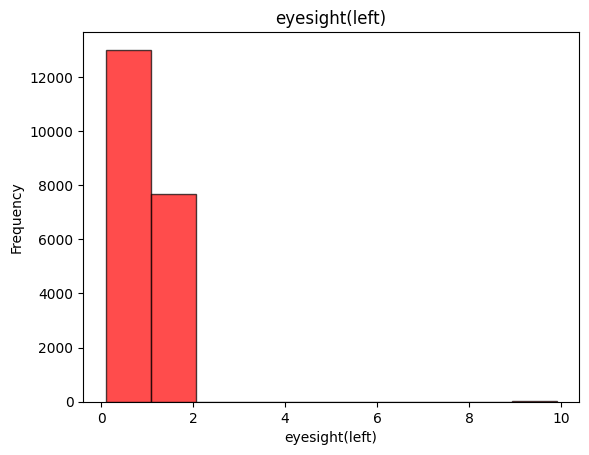

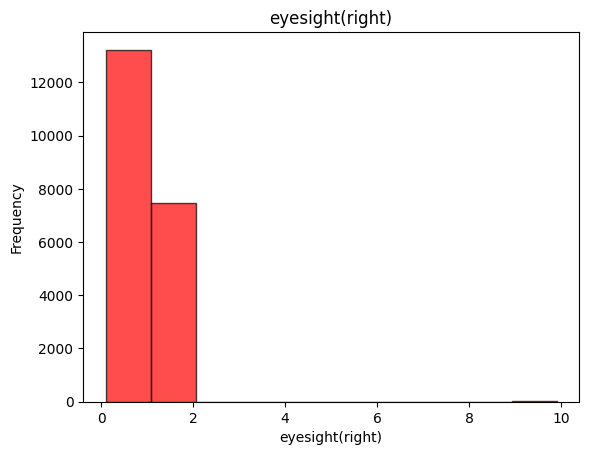

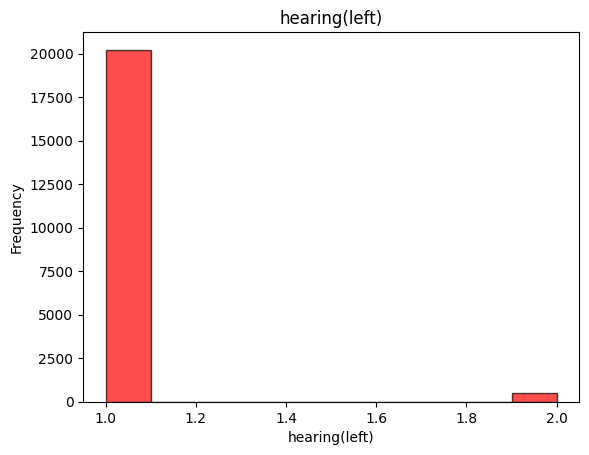

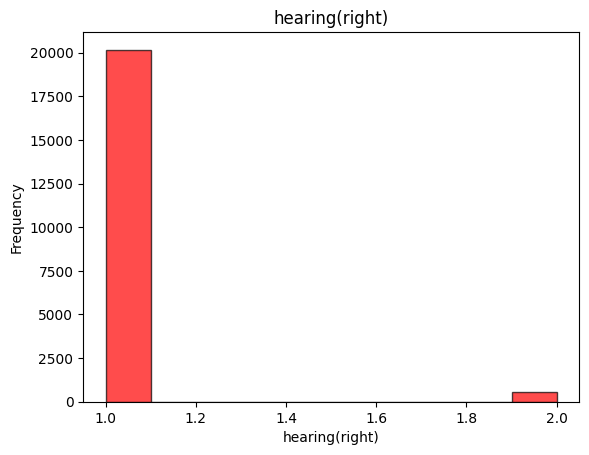

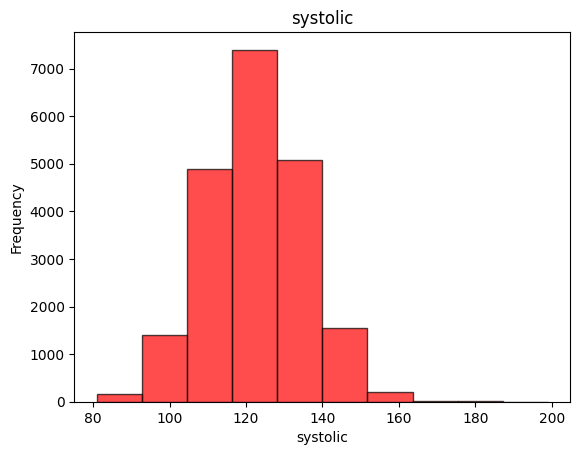

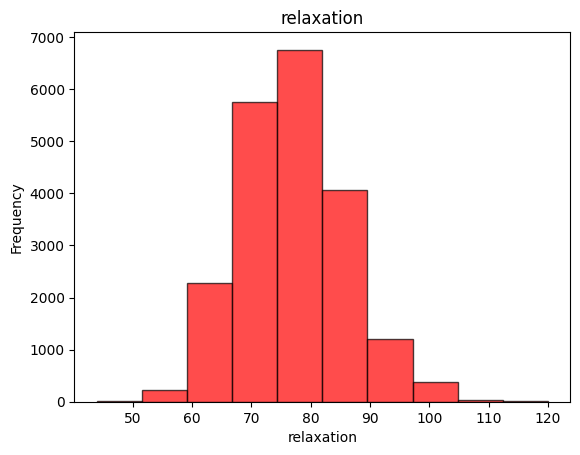

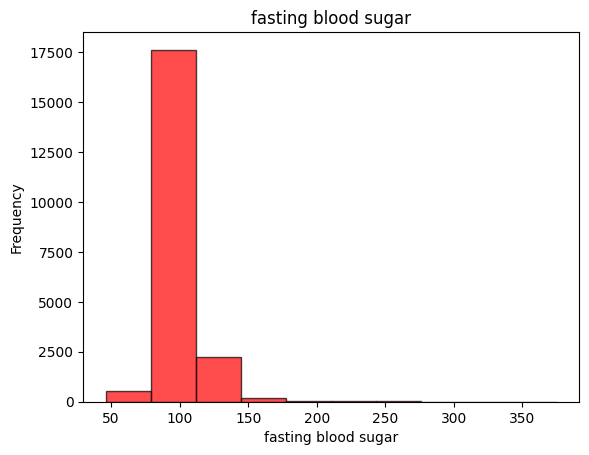

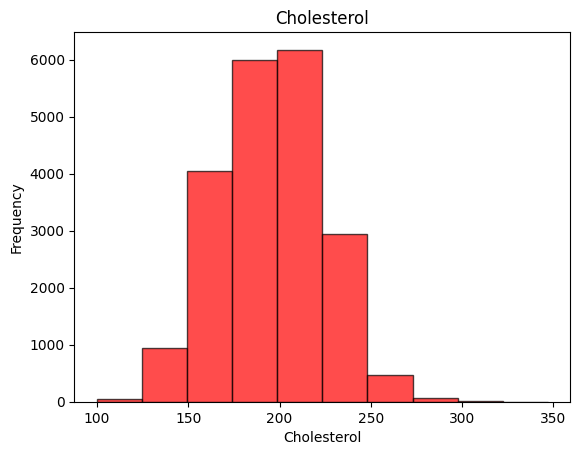

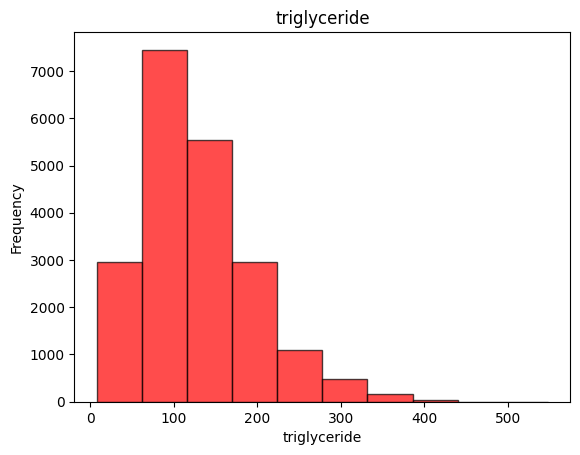

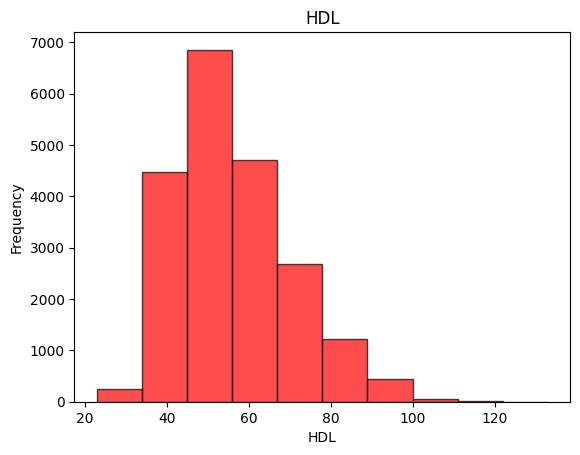

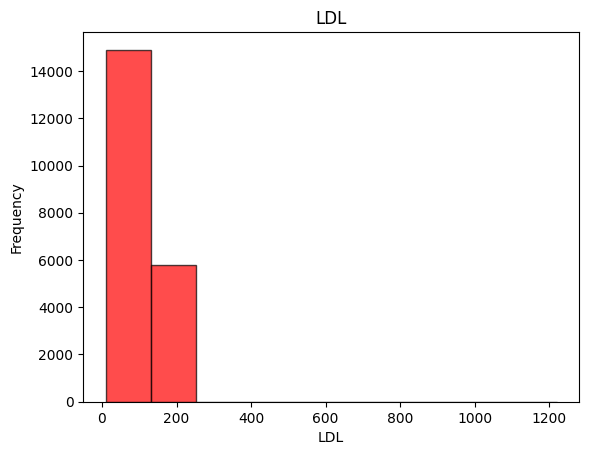

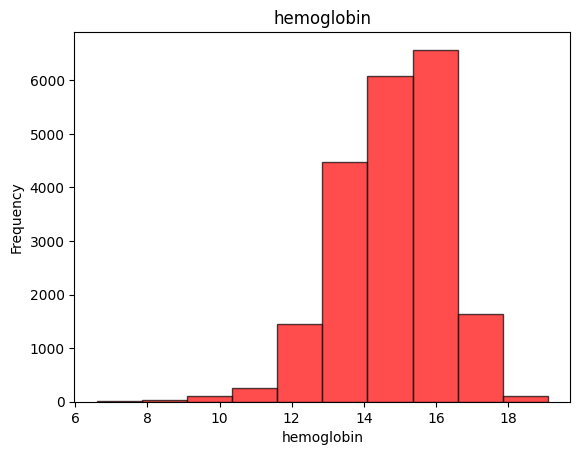

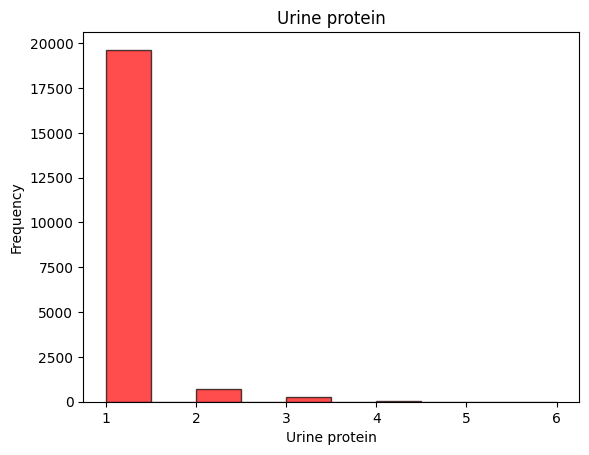

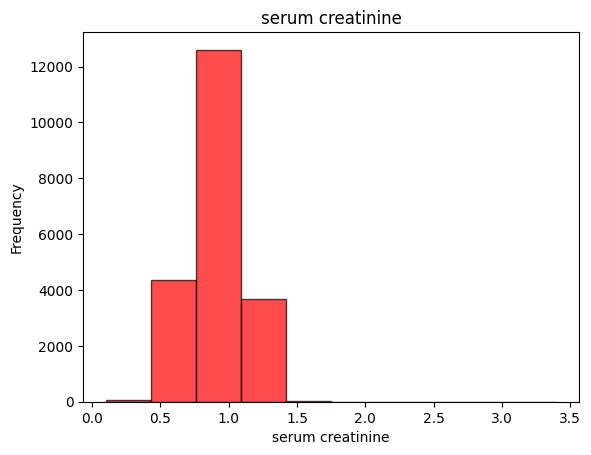

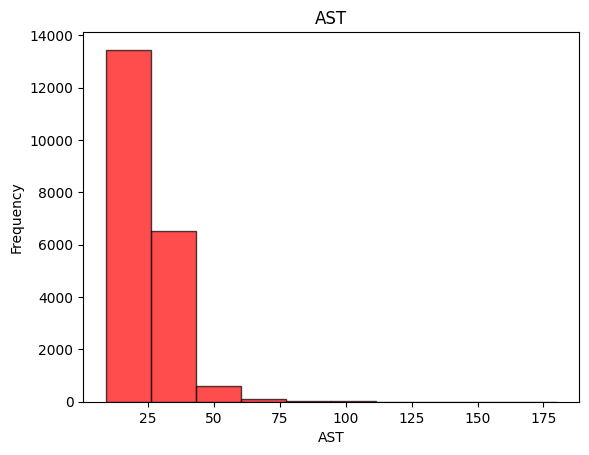

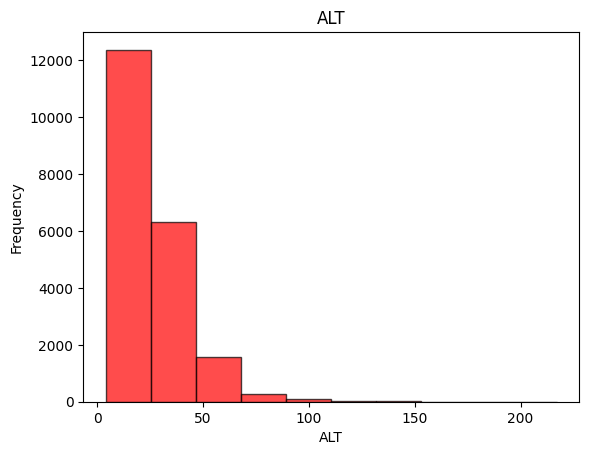

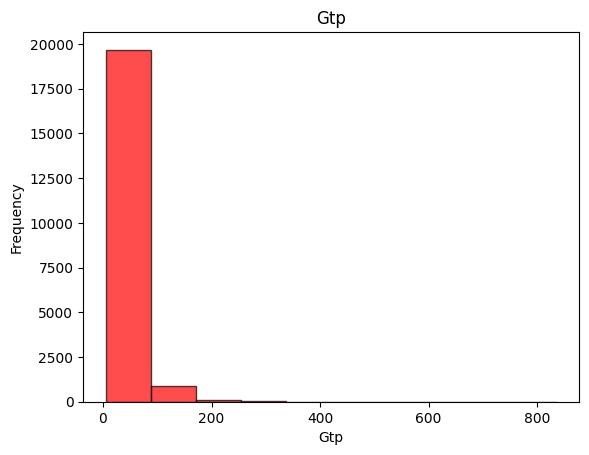

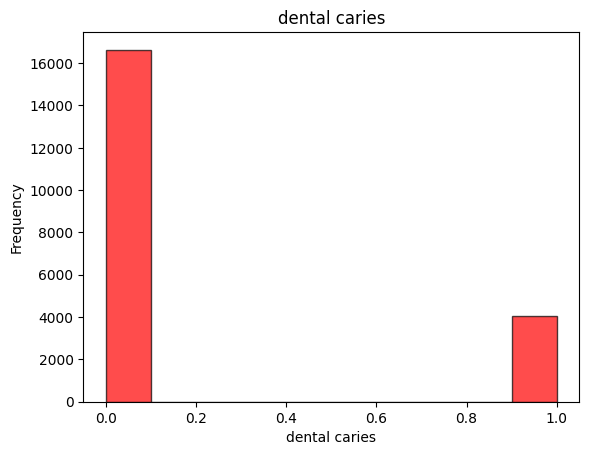

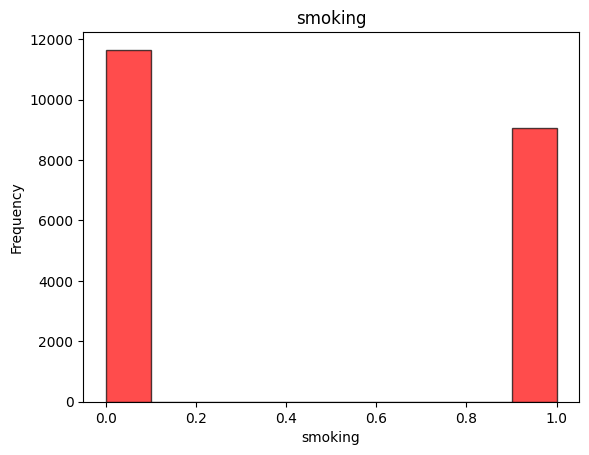

In [10]:
#Cheking distributions of the data
for i, col in enumerate(df.columns):
    df[col].plot(
        kind='hist',
        color= 'red',  
        edgecolor='black',  
        alpha=0.7  
    )
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
#     plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.show()


### Dividing features and target variable

In [11]:
X = df.drop('smoking', axis=1)
y = df['smoking']

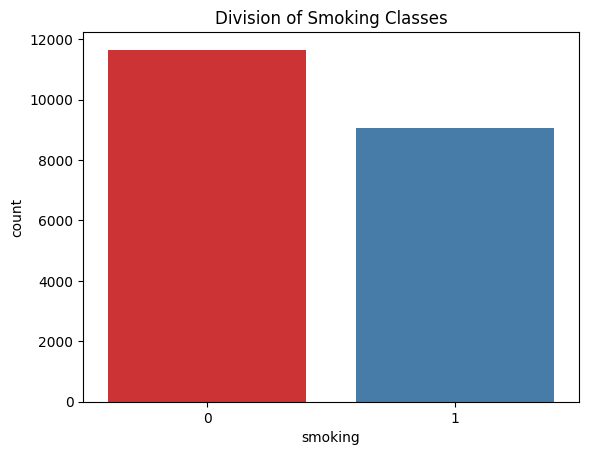

In [12]:
sns.countplot(x=y, palette='Set1') 
plt.title('Division of Smoking Classes')
plt.show()

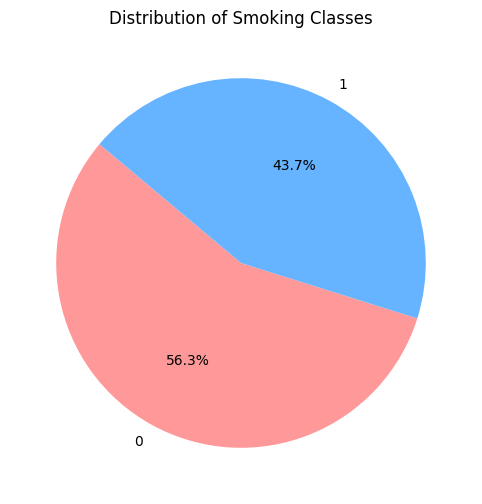

In [13]:
plt.figure(figsize=(8, 6))
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])  
plt.title('Distribution of Smoking Classes')
plt.show()


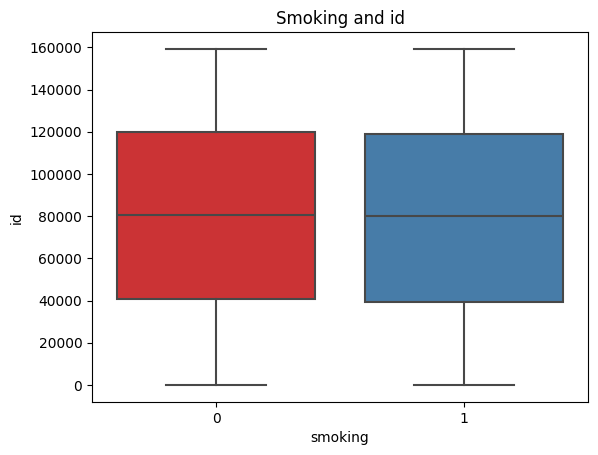

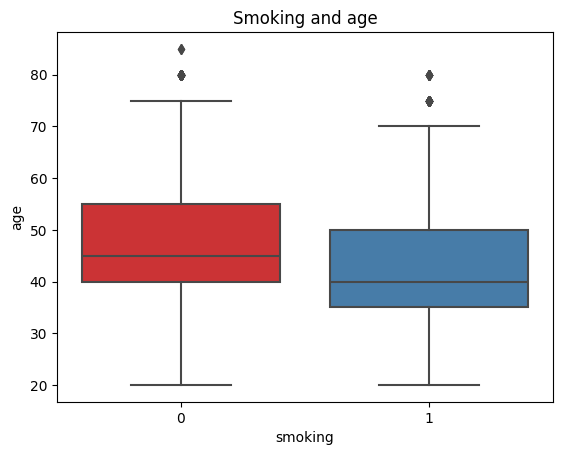

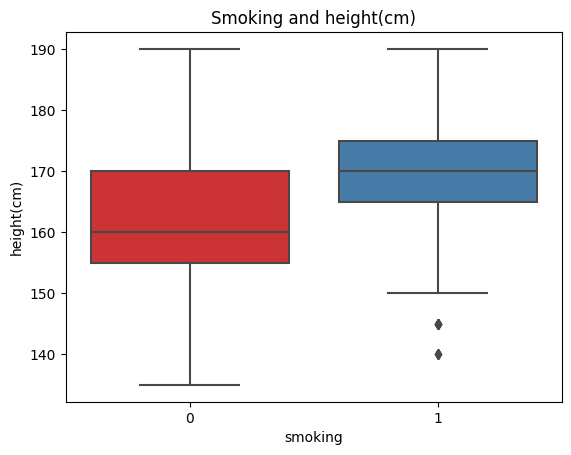

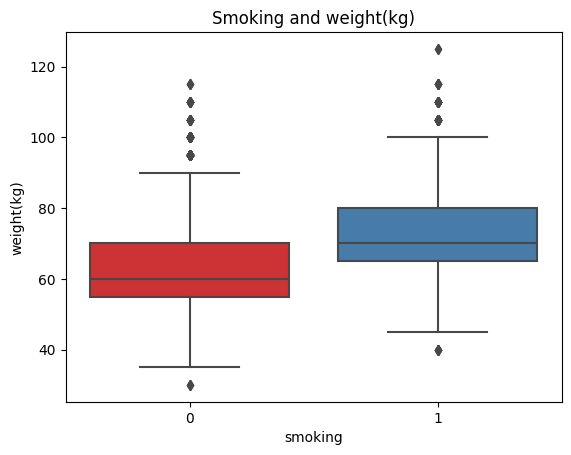

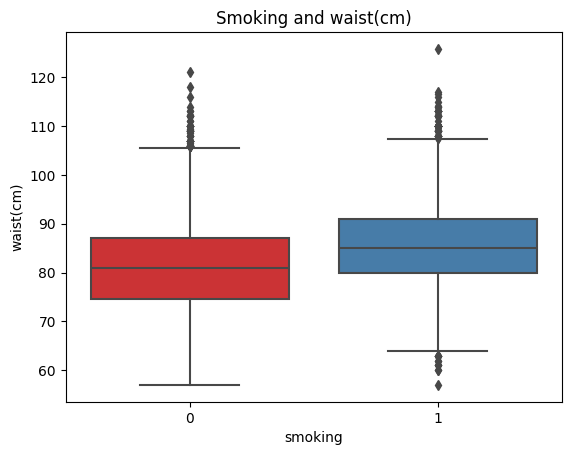

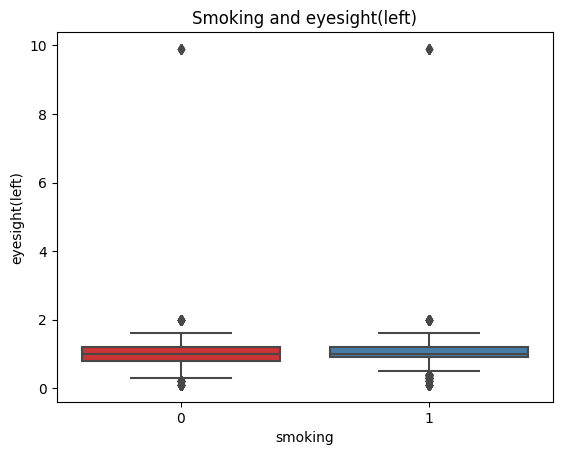

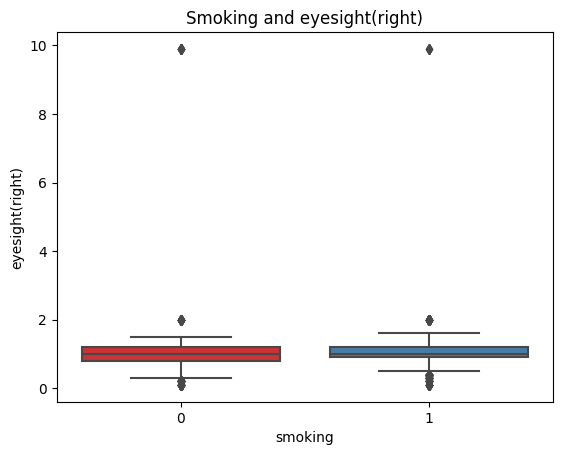

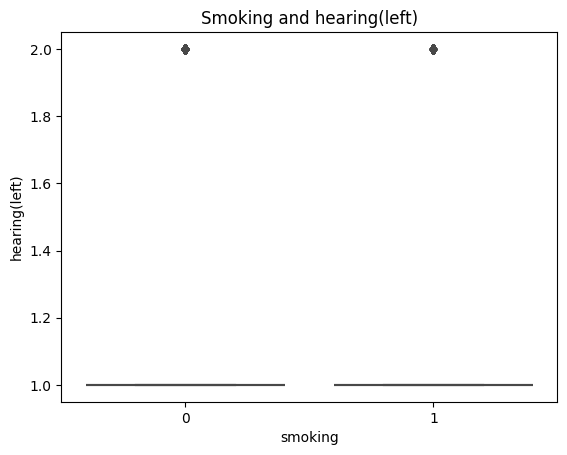

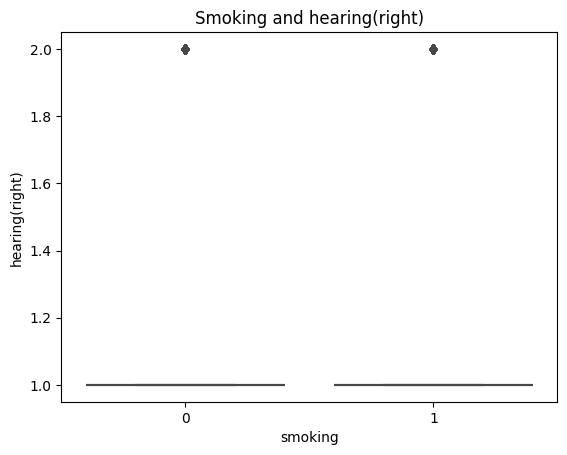

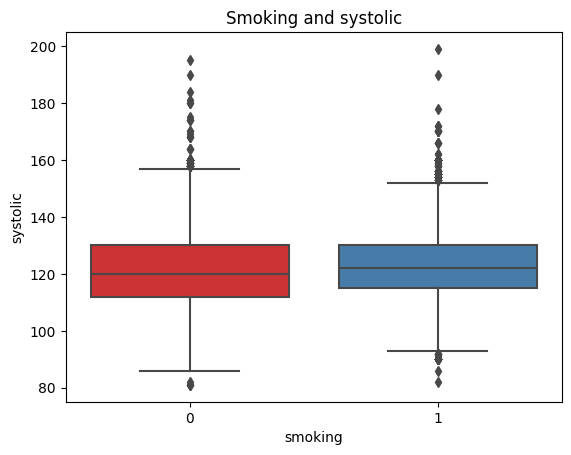

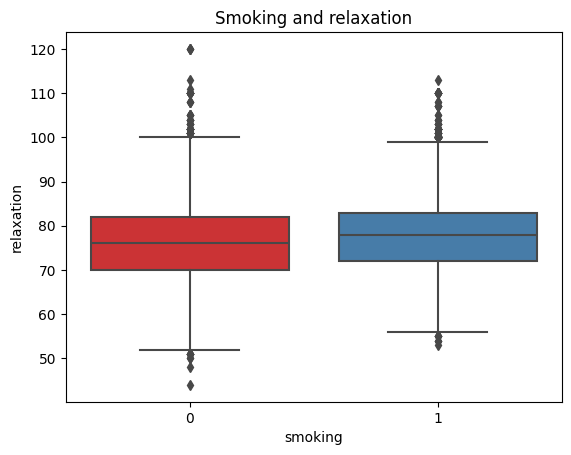

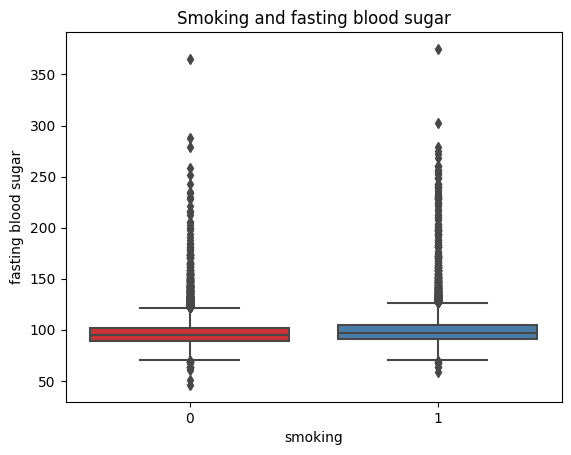

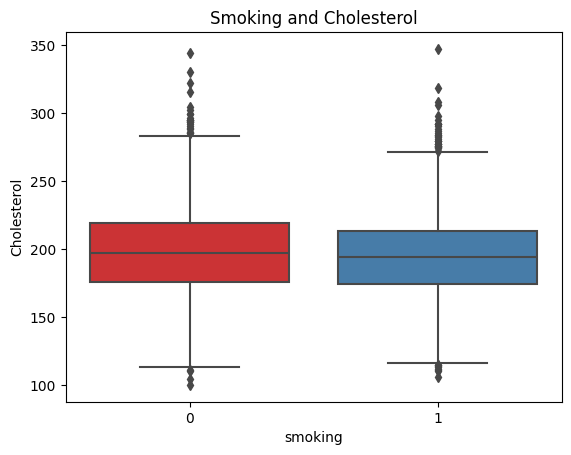

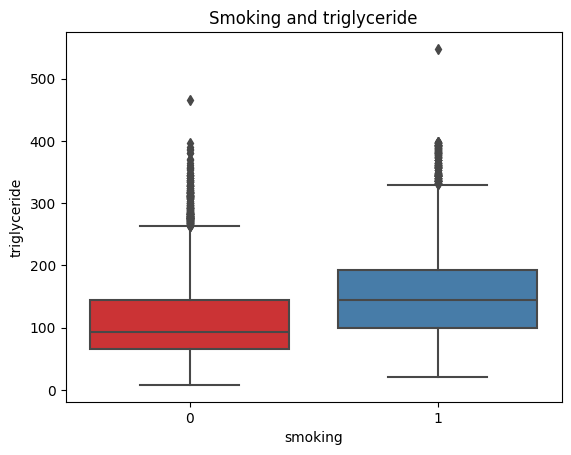

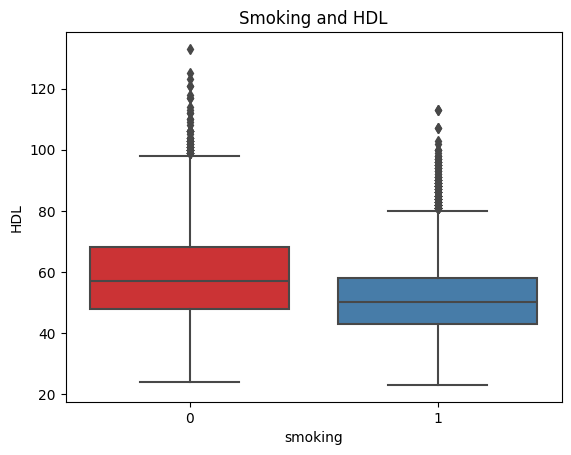

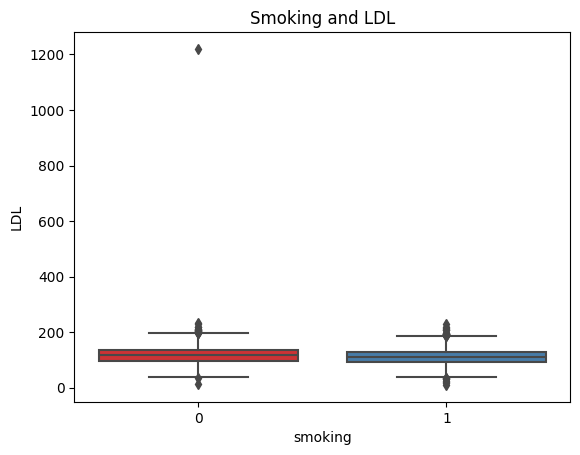

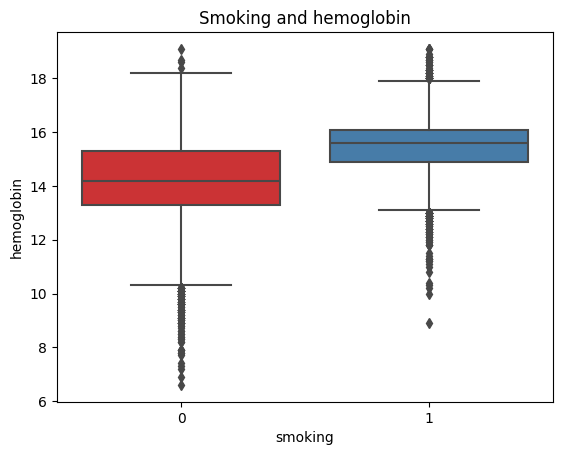

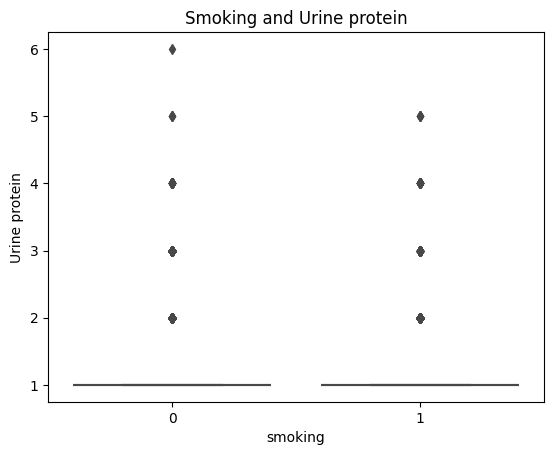

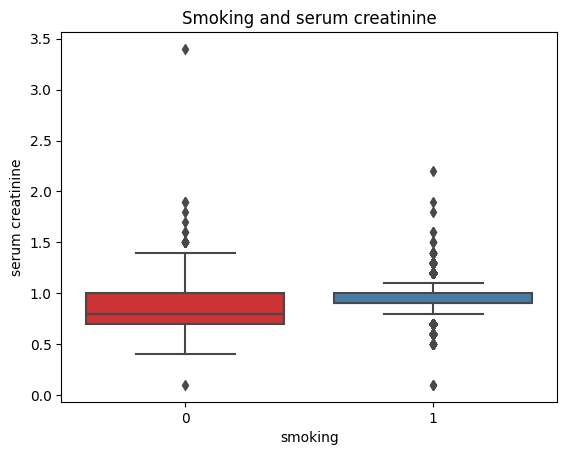

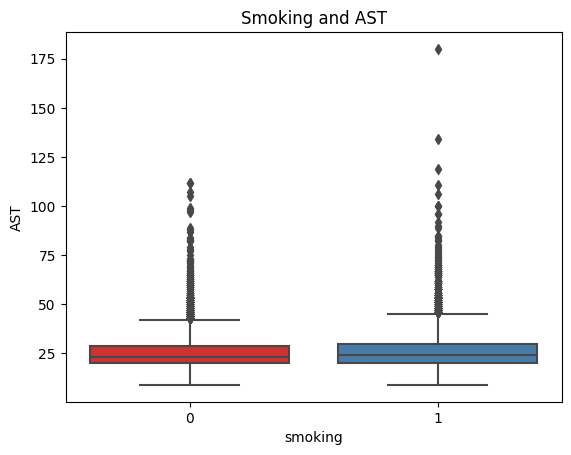

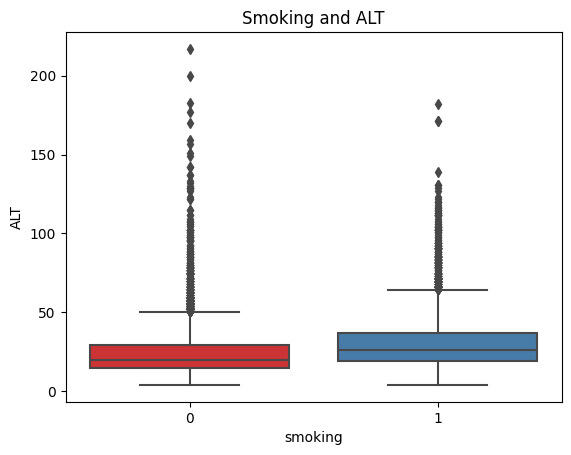

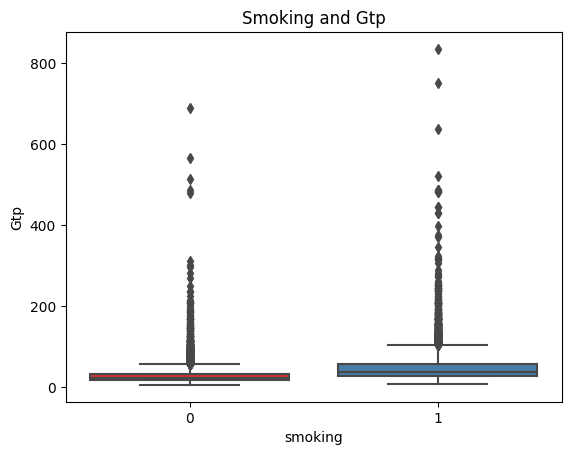

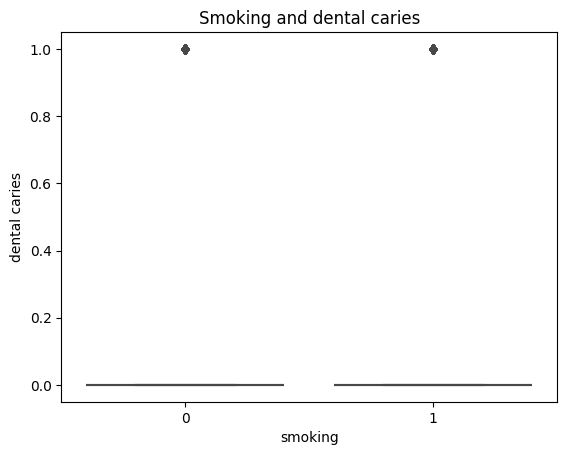

In [14]:
# Boxplots for features against the target variable
for column in X.columns:
    sns.boxplot(x=y, y=X[column], palette='Set1')
    plt.title(f'Smoking and {column}')
    plt.show()

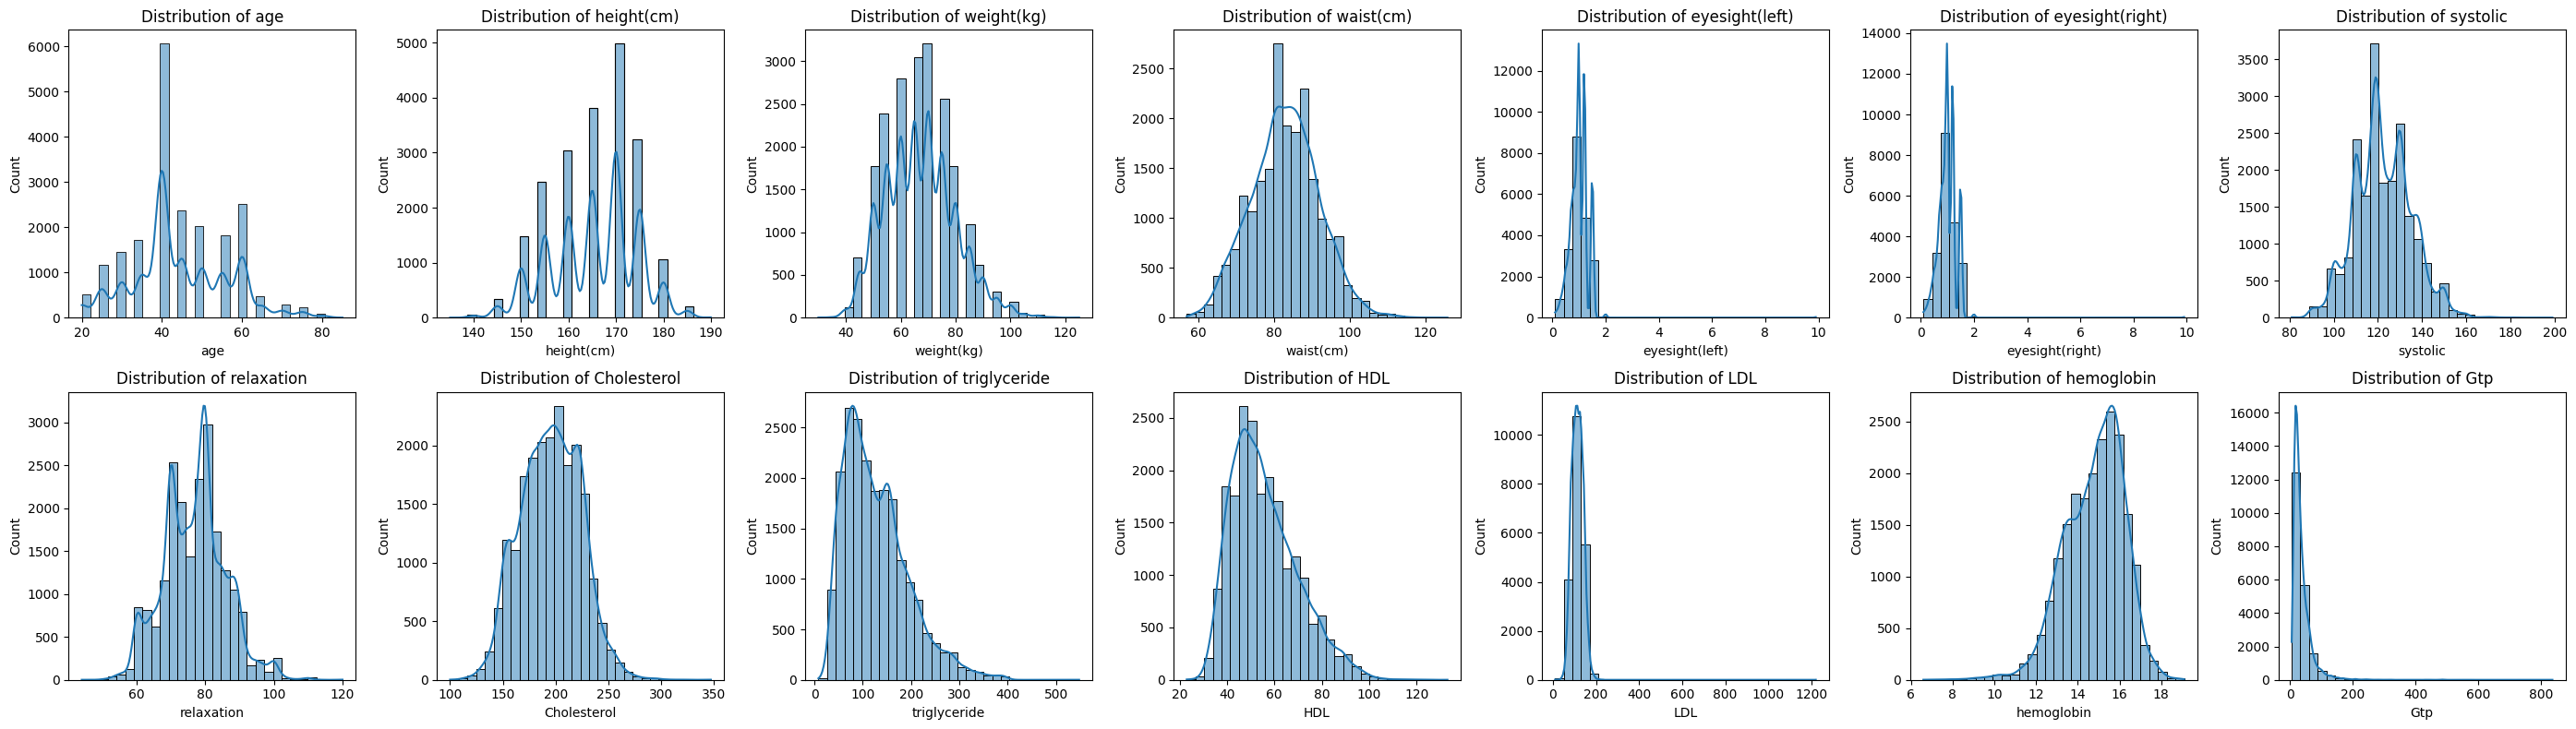

In [15]:
numvars = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic',
                  'relaxation', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Gtp']

# Histograms for numerical variables in the sampled dataframe
plt.figure(figsize=(28, 8))  
for i, var in enumerate(numvars):
    plt.subplot(2, 7, i+1)  
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()
plt.show()


- Age distribution shows distinct peaks in specific age groups, potentially highlighting common ages at which smoking behavior is more prevalent.
- Height follows a normal distribution around the mean, with no significant outliers related to smoking.
- Weight exhibits a normal distribution centered around the average weight, which could help examine if smoking influences average body weight.
- Waist measurements are slightly right-skewed, suggesting that some smokers may have larger waist sizes, which could be explored for possible correlations with smoking habits.

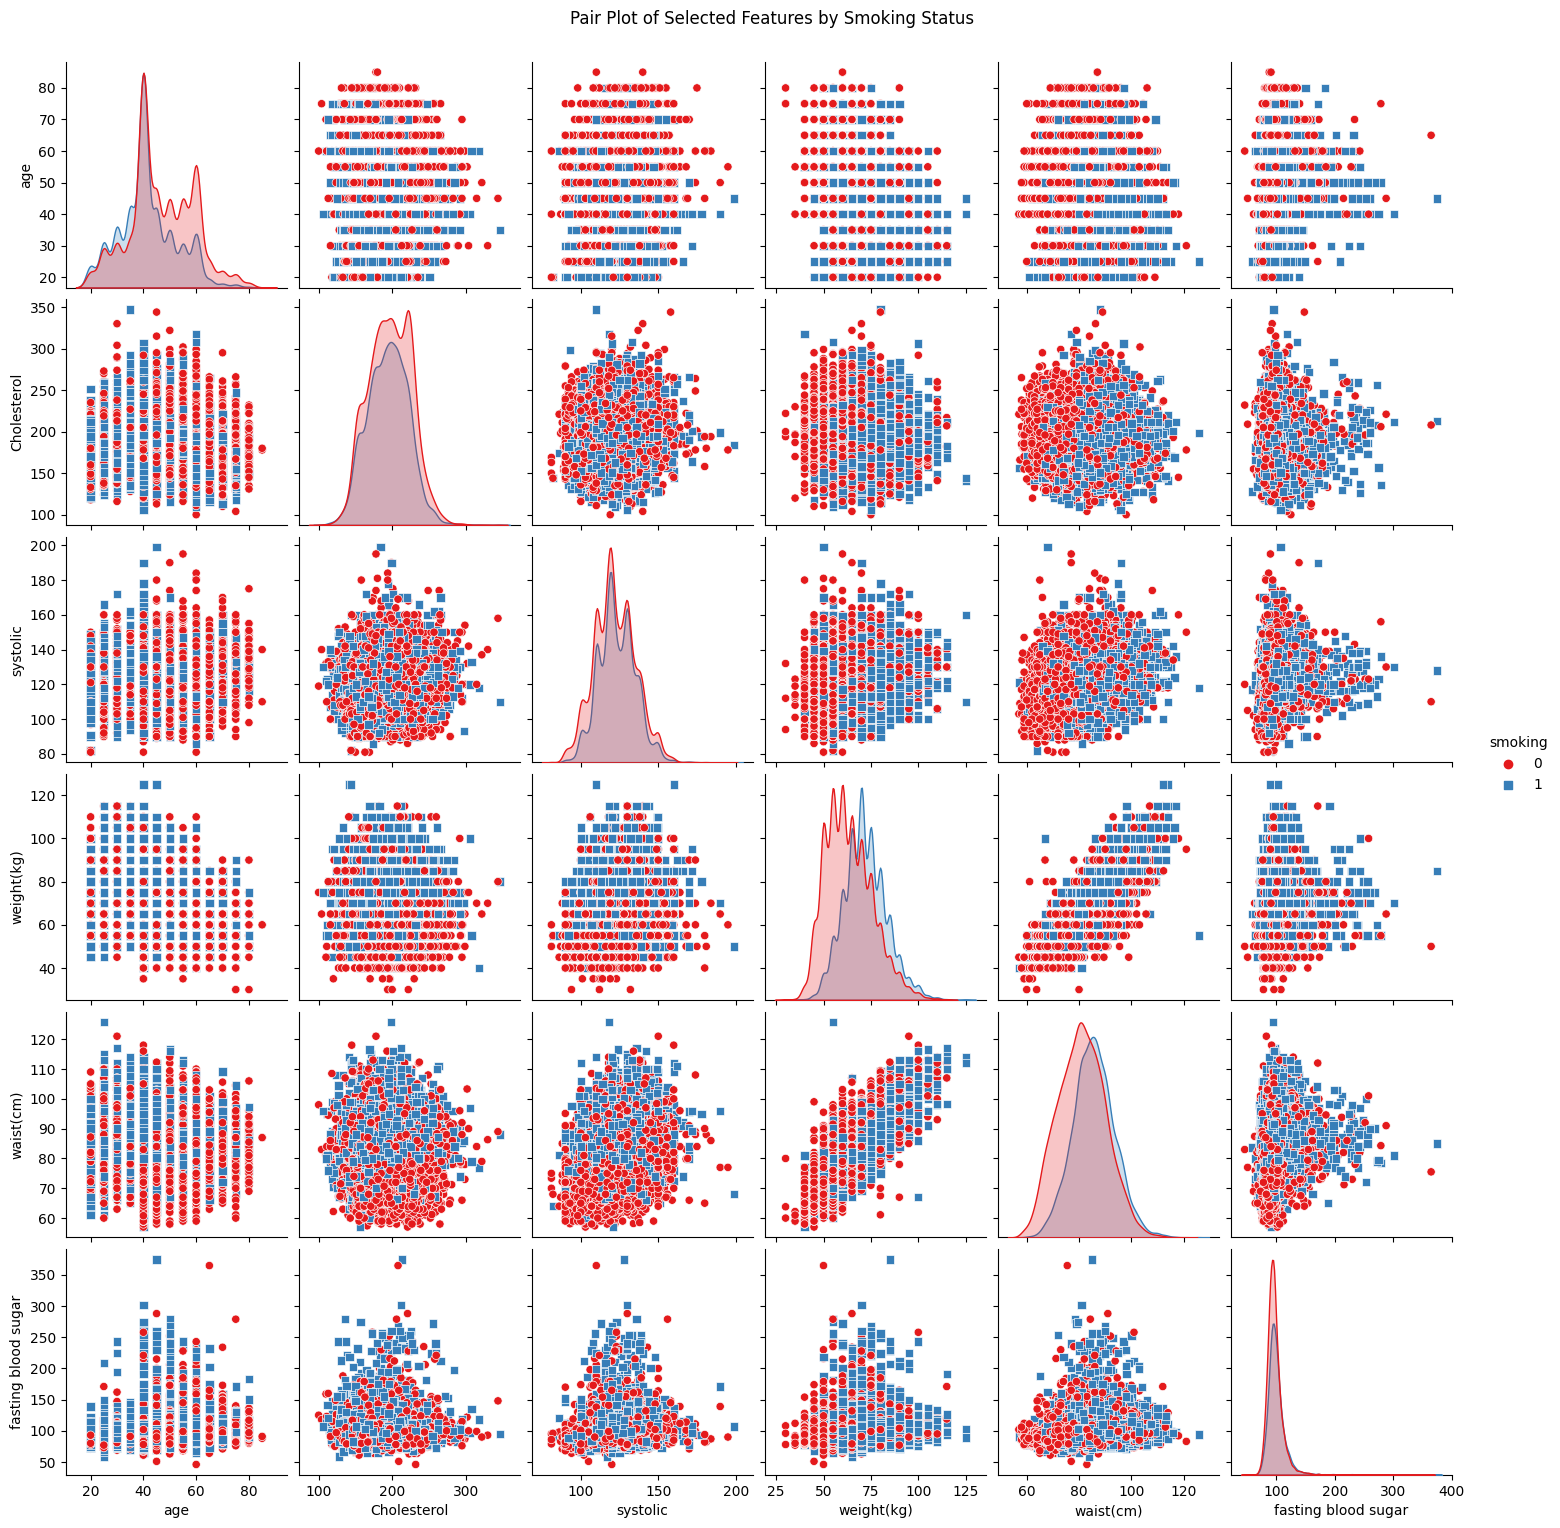

In [16]:
#Pair plot for relevant features
selected_features = ['age', 'Cholesterol', 'systolic','weight(kg)',
                             'waist(cm)', 'fasting blood sugar','smoking']

sns.pairplot(df[selected_features], hue='smoking', diag_kind='kde', markers=["o", "s"], palette='Set1')  
plt.suptitle('Pair Plot of Selected Features by Smoking Status', y=1.02)
plt.show()

# Feature Engineering

In [17]:
# Creating new features BMI, Eyesight average, AST to ALT ratio,Total Cholesterol
df['BMI'] = df['weight(kg)'] / (df['height(cm)']/100)**2
df['eyesight_avg'] = (df['eyesight(left)'] + df['eyesight(right)']) / 2
df['liver_ratio'] = df['AST'] / df['ALT']
df['cholesterol_lvl'] = df['HDL'] + df['LDL']

df.head()

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
105607  105607   25         175          70       78.0             1.0   
115102  115102   40         165          70       89.0             1.2   
52630    52630   60         165          65       89.0             1.5   
86352    86352   30         165          60       74.0             1.2   
17508    17508   55         165          70       86.0             0.8   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
105607              1.0              1               1       110          68   
115102              1.2              1               1       117          73   
52630               1.2              1               1       130          90   
86352               1.0              1               1       133          85   
17508               1.0              1               1       130          85   

        fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
105607                  101          204           119   36  143        15.9   
115102                  101          209           129   41  144        13.7   
52630                    93          204           183   93   79        14.6   
86352                   112          214           161   48  133        15.7   
17508                   132          204           134   52  126        15.0   

        Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
105607              1               1.3   21   23   29              1   
115102              1               1.0   30   28   16              0   
52630               1               0.5   25   25   38              0   
86352               1               0.9   20   24   34              1   
17508               1               1.2   27   23   30              0   

        smoking        BMI  eyesight_avg  liver_ratio  cholesterol_lvl  
105607        1  22.857143          1.00     0.913043              179  
115102        0  25.711662          1.20     1.071429              185  
52630         0  23.875115          1.35     1.000000              172  
86352         1  22.038567          1.10     0.833333              181  
17508         0  25.711662          0.90     1.173913              178

In [18]:
df.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'BMI', 'eyesight_avg',
       'liver_ratio', 'cholesterol_lvl'],
      dtype='object')

In [19]:
df.describe().T

count          mean           std         min  \
id                   20703.0  79992.953678  45991.026030    4.000000   
age                  20703.0     44.361204     11.828478   20.000000   
height(cm)           20703.0    165.337632      8.799525  135.000000   
weight(kg)           20703.0     67.125054     12.519781   30.000000   
waist(cm)            20703.0     82.995537      8.915482   57.000000   
eyesight(left)       20703.0      1.004333      0.369564    0.100000   
eyesight(right)      20703.0      1.000647      0.373639    0.100000   
hearing(left)        20703.0      1.023282      0.150800    1.000000   
hearing(right)       20703.0      1.025600      0.157943    1.000000   
systolic             20703.0    122.471188     12.684425   81.000000   
relaxation           20703.0     76.889388      9.025835   44.000000   
fasting blood sugar  20703.0     98.463556     15.930029   46.000000   
Cholesterol          20703.0    195.508139     28.321524  100.000000   
triglyceride         20703.0    127.655509     66.212247    8.000000   
HDL                  20703.0     55.798677     13.955466   23.000000   
LDL                  20703.0    114.310825     27.112073   10.000000   
hemoglobin           20703.0     14.809709      1.420698    6.600000   
Urine protein        20703.0      1.072598      0.343444    1.000000   
serum creatinine     20703.0      0.892397      0.176745    0.100000   
AST                  20703.0     25.532870      8.619282    9.000000   
ALT                  20703.0     26.629039     15.341564    4.000000   
Gtp                  20703.0     36.405690     32.377581    5.000000   
dental caries        20703.0      0.196445      0.397318    0.000000   
smoking              20703.0      0.437376      0.496075    0.000000   
BMI                  20703.0     24.426847      3.354916   13.333333   
eyesight_avg         20703.0      1.002490      0.319032    0.100000   
liver_ratio          20703.0      1.108277      0.405122    0.104348   
cholesterol_lvl      20703.0    170.109501     29.253847   60.000000   

                              25%           50%            75%            max  
id                   40121.500000  80446.000000  119491.500000  159249.000000  
age                     40.000000     40.000000      55.000000      85.000000  
height(cm)             160.000000    165.000000     170.000000     190.000000  
weight(kg)              60.000000     65.000000      75.000000     125.000000  
waist(cm)               77.000000     83.000000      89.000000     125.800000  
eyesight(left)           0.800000      1.000000       1.200000       9.900000  
eyesight(right)          0.800000      1.000000       1.200000       9.900000  
hearing(left)            1.000000      1.000000       1.000000       2.000000  
hearing(right)           1.000000      1.000000       1.000000       2.000000  
systolic               114.000000    121.000000     130.000000     199.000000  
relaxation              70.000000     78.000000      82.000000     120.000000  
fasting blood sugar     90.000000     96.000000     103.000000     375.000000  
Cholesterol            175.000000    196.000000     217.000000     347.000000  
triglyceride            77.000000    115.000000     164.000000     548.000000  
HDL                     45.000000     53.000000      64.000000     133.000000  
LDL                     95.000000    114.000000     133.000000    1220.000000  
hemoglobin              13.800000     15.000000      15.800000      19.100000  
Urine protein            1.000000      1.000000       1.000000       6.000000  
serum creatinine         0.800000      0.900000       1.000000       3.400000  
AST                     20.000000     24.000000      29.000000     180.000000  
ALT                     16.000000     22.000000      33.000000     217.000000  
Gtp                     18.000000     27.000000      44.000000     836.000000  
dental caries            0.000000      0.000000       0.000000       1.000000  
smoking       

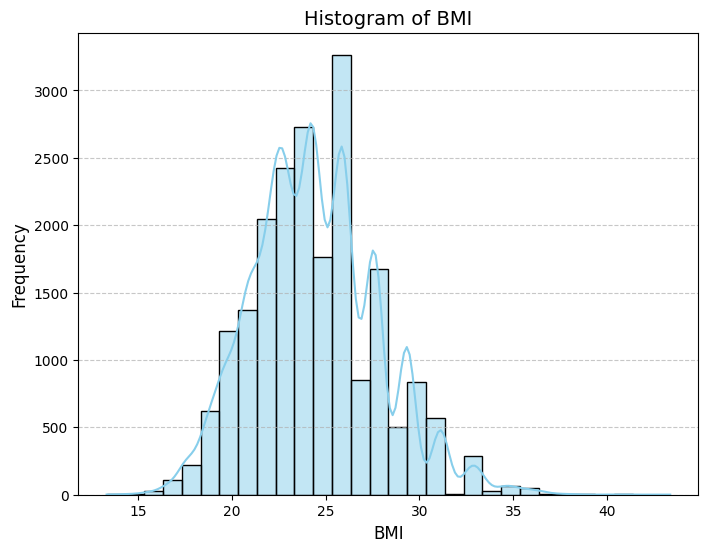

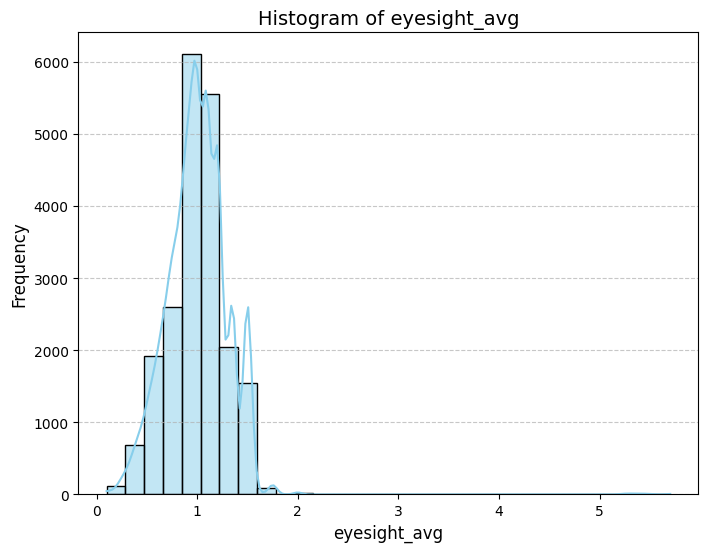

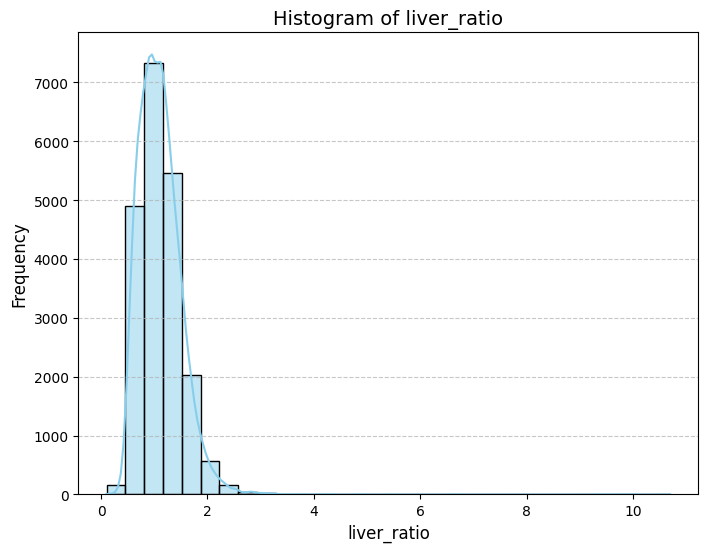

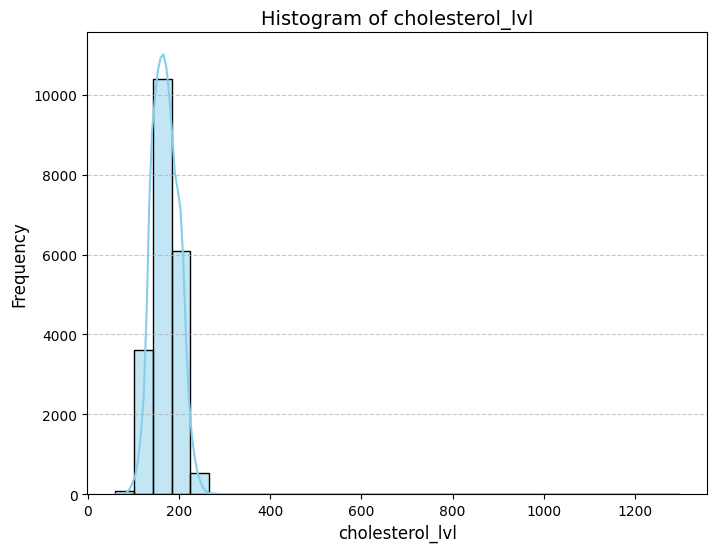

In [20]:
# Checking distributions of featured varibles
features_to_evaluate = ['BMI', 'eyesight_avg', 'liver_ratio', 'cholesterol_lvl']

for feature in features_to_evaluate:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue') 
    plt.title(f'Histogram of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


## Scaling the data - standardization

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#separate cols
X = df.drop(['smoking', 'id'], axis=1)
y = df['smoking']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#standardize
scaler = StandardScaler()
scaler.fit(X_train)

# Transforming both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training Models without processing first

# Logistic regression 

In [22]:
from sklearn.linear_model import LogisticRegression

# We're creating a Logistic Regression model and setting a random state so we can reproduce the results later
logistic_model = LogisticRegression(random_state=42)
# Now we're training the model with our scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Let's make some predictions using our model on the scaled test data
logistic_predictions = logistic_model.predict(X_test_scaled)
# We'll check how accurate our model's predictions are
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
# And we'll also look at the ROC AUC score to see how well our model distinguishes between classes
logistic_roc_auc = roc_auc_score(y_test, logistic_predictions)

# Finally, we're evaluating our model by printing out the scores and a detailed report
print(f'Logistic Regression ROC AUC Score: {logistic_roc_auc}')
print(f"Logistic Regression Accuracy: {logistic_accuracy*100:.2f}%")
print(classification_report(y_test, logistic_predictions))


Logistic Regression ROC AUC Score: 0.7445753537632446
Logistic Regression Accuracy: 74.62%
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2330
           1       0.70      0.73      0.72      1811

    accuracy                           0.75      4141
   macro avg       0.74      0.74      0.74      4141
weighted avg       0.75      0.75      0.75      4141



# Random forest 

Random Forest ROC AUC Score: 0.7706848704744255
Random Forest Accuracy: 76.77%
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      2330
           1       0.71      0.79      0.75      1811

    accuracy                           0.77      4141
   macro avg       0.77      0.77      0.77      4141
weighted avg       0.77      0.77      0.77      4141



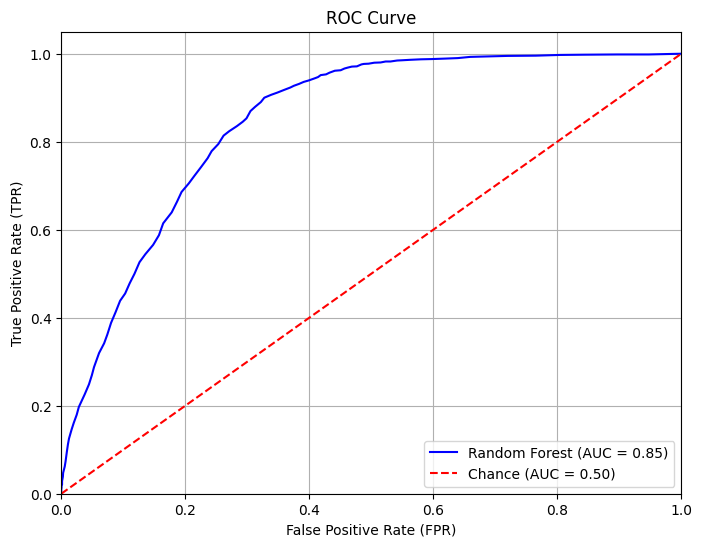

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model with 100 trees and set a random state for reproducibility
rf = RandomForestClassifier(n_estimators=100, random_state=40)
# Train the model with our scaled training data
rf.fit(X_train_scaled, y_train)

# Make predictions using the trained model on the scaled test data
rf_pred = rf.predict(X_test_scaled)
# Check the accuracy of the model's predictions
rf_acc = accuracy_score(y_test, rf_pred)
# Check the ROC AUC score to evaluate how well the model distinguishes between classes
rf_auc = roc_auc_score(y_test, rf_pred)

# Print the evaluation metrics
print(f'Random Forest ROC AUC Score: {rf_auc}')
print(f"Random Forest Accuracy: {rf_acc*100:.2f}%")
print(classification_report(y_test, rf_pred))

# Get the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Chance (AUC = 0.50)', color='red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# XGBoost 

In [24]:
from xgboost import XGBClassifier

# Create an XGBoost model with a fixed random state and log loss as the evaluation metric
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model with the scaled training data
xgb.fit(X_train_scaled, y_train)

# Predict the probabilities for the positive class in the test data
xgb_probs = xgb.predict_proba(X_test_scaled)[:, 1]
# Calculate the ROC AUC score for the predictions
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Print the ROC AUC score
print(f'XGBoost ROC AUC Score: {xgb_auc}')


XGBoost ROC AUC Score: 0.8478504039453696


## Improvements for better results



# Feature selection

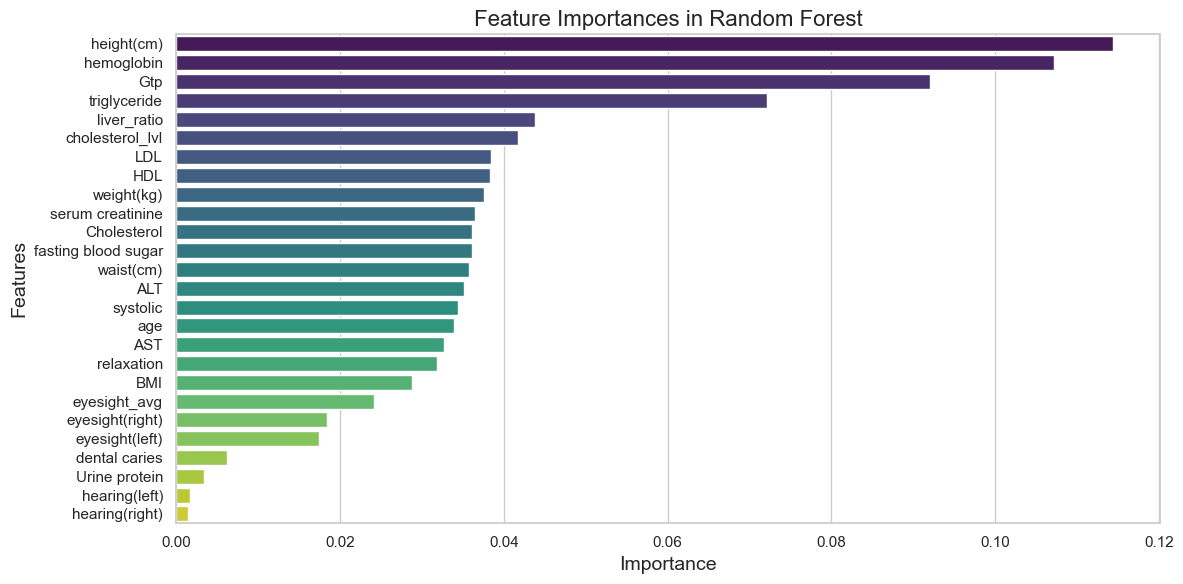

In [25]:
feature_importances = pd.DataFrame(
    rf.feature_importances_,
    index=X_train.columns,
    columns=['Importance']
).sort_values('Importance', ascending=False)

sns.set(style="whitegrid")

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importances['Importance'], 
    y=feature_importances.index, 
    palette="viridis"
)
plt.title('Feature Importances in Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()


In [26]:
# Converting the scaled arrays back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Top Features -  Random Forest

In [27]:
# Extracting feature importances from the trained Random Forest model
importances = rf.feature_importances_
feature_names = X_train.columns
# Creating a Series with feature importances and sorting them in descending order
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Selecting the top 10 most important features
N = 10 
top_features = feature_importances.nlargest(N).index

# Retraining the Random Forest model using only the top N features
rf_top = RandomForestClassifier(n_estimators=100, random_state=40)
rf_top.fit(X_train_scaled_df[top_features], y_train)

# Making predictions with the new model on the test data
rf_top_pred = rf_top.predict(X_test_scaled_df[top_features])

# Evaluating the new model's performance
rf_top_acc = accuracy_score(y_test, rf_top_pred)
rf_top_auc = roc_auc_score(y_test, rf_top_pred)
print(f'Improved Random Forest with Top {N} Features ROC AUC Score: {rf_top_auc}')
print(f"Improved Random Forest with Top {N} Features Accuracy: {rf_top_acc*100:.2f}%")
print(classification_report(y_test, rf_top_pred))


Improved Random Forest with Top 10 Features ROC AUC Score: 0.7567913537442856
Improved Random Forest with Top 10 Features Accuracy: 75.44%
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      2330
           1       0.70      0.78      0.73      1811

    accuracy                           0.75      4141
   macro avg       0.75      0.76      0.75      4141
weighted avg       0.76      0.75      0.76      4141



Selecting Top 10 features reduced my Model's accuracy which it was able to achieve before so will do hyperparameter tuning

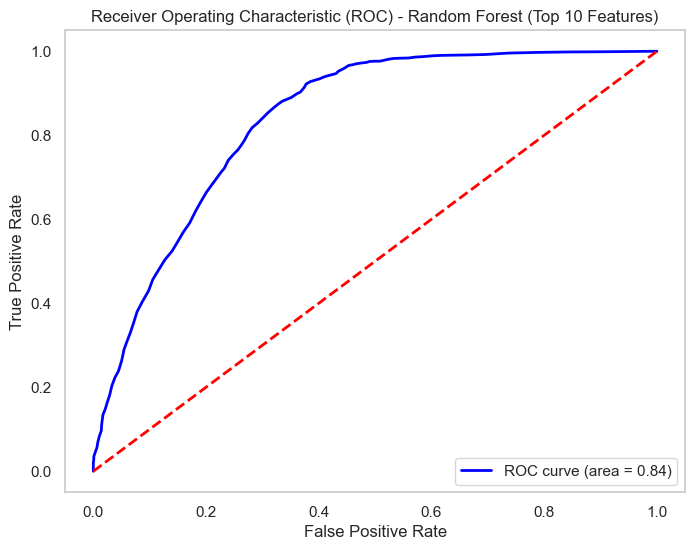

In [28]:
# Predict probabilities using the newly trained model
rf_probs = rf_top.predict_proba(X_test_scaled_df[top_features])[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) - Random Forest (Top {N} Features)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Optimizing hyperparameters

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],   
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [10, 20, 30, None],   
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]      
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=40)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, 
                           n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train_scaled_df, y_train)

# Get the best parameters from the grid search
print("Best Parameters: ", grid_search.best_params_)

# Train a new model with the best parameters
best_rf = grid_search.best_estimator_

# Make predictions with the new model
best_rf_pred = best_rf.predict(X_test_scaled_df)

# Evaluate the new model
best_rf_acc = accuracy_score(y_test, best_rf_pred)
best_rf_auc = roc_auc_score(y_test, best_rf_pred)
print(f'Best Random Forest Model (Full Features) ROC AUC Score: {best_rf_auc}')
print(f"Best Random Forest Model (Full Features) Accuracy: {best_rf_acc*100:.2f}%")
print(classification_report(y_test, best_rf_pred))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=au

Best Parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Random Forest Model (Full Features) ROC AUC Score: 0.7806869322665732
Best Random Forest Model (Full Features) Accuracy: 77.59%
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2330
           1       0.71      0.82      0.76      1811

    accuracy                           0.78      4141
   macro avg       0.78      0.78      0.78      4141
weighted avg       0.78      0.78      0.78      4141



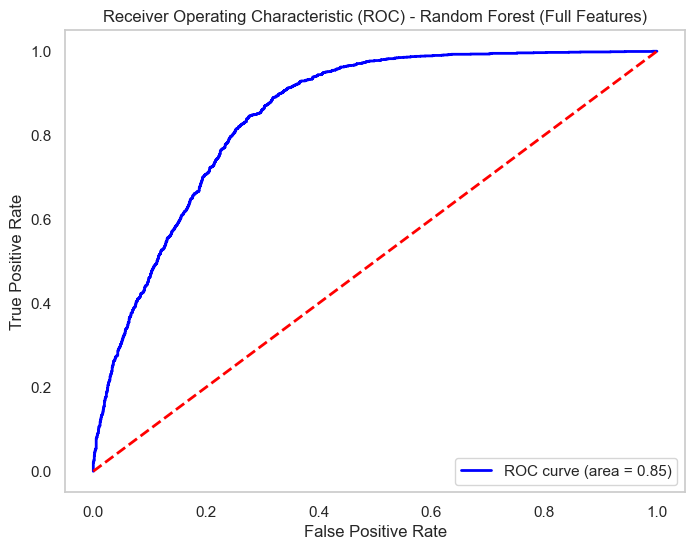

In [30]:
# Predict probabilities for the positive class
best_rf_probs = best_rf.predict_proba(X_test_scaled_df)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, best_rf_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest (Full Features)')
plt.legend(loc="lower right")
plt.grid()
plt.show()



# Logistic Regression with PCA

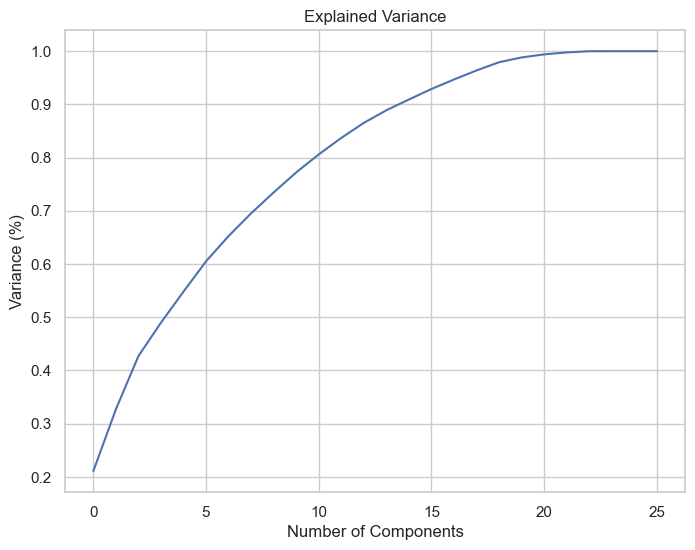

In [31]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA().fit(X_train_scaled_df)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()


This plot will take 95% of the variance

In [32]:
from sklearn.pipeline import Pipeline

# Based on the previous plot, setting the number of principal components to 95% of the variance
n_comp = 0.95  
pca = PCA(n_components=n_comp)

# Creating a pipeline with PCA and Logistic Regression
pipe = Pipeline(steps=[('pca', pca), ('log', LogisticRegression(random_state=42))])

# Training the model with scaled training data
pipe.fit(X_train_scaled_df, y_train)

# Making predictions on the scaled test data
pipe_pred = pipe.predict(X_test_scaled_df)

# Evaluating the model's performance
pipe_acc = accuracy_score(y_test, pipe_pred)
pipe_auc = roc_auc_score(y_test, pipe_pred)
print(f'Logistic Regression with PCA ROC AUC Score: {pipe_auc}')
print(f"Logistic Regression with PCA Accuracy: {pipe_acc*100:.2f}%")
print(classification_report(y_test, pipe_pred))


Logistic Regression with PCA ROC AUC Score: 0.7419675421778686
Logistic Regression with PCA Accuracy: 74.40%
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2330
           1       0.70      0.73      0.71      1811

    accuracy                           0.74      4141
   macro avg       0.74      0.74      0.74      4141
weighted avg       0.75      0.74      0.74      4141



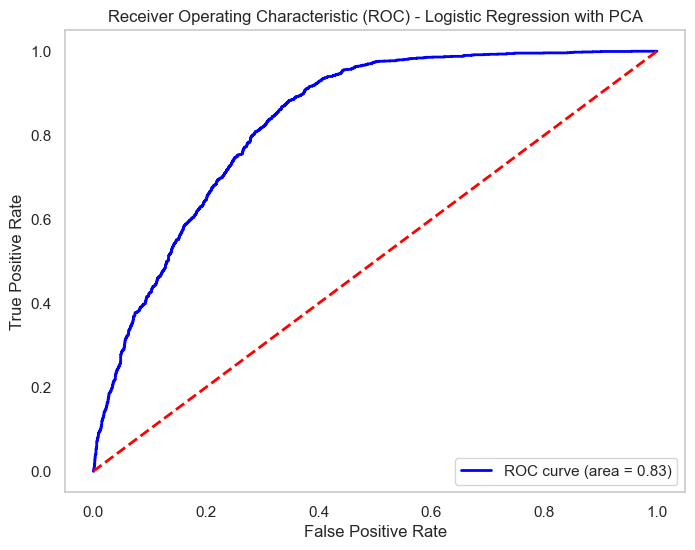

In [33]:
# Predict probabilities for the positive class using the logistic regression model with PCA
pipe_probs = pipe.predict_proba(X_test_scaled_df)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, pipe_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression with PCA')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# XGBoost - Hyperparameter Tuning

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train_scaled_df, y_train)

# Get the best parameters from the grid search
print("Best Parameters: ", grid_search.best_params_)

# Train a new model with the best parameters
best_xgb = grid_search.best_estimator_

# Make predictions with the new model
best_xgb_pred = best_xgb.predict(X_test_scaled_df)

# Evaluate the new model
best_xgb_acc = accuracy_score(y_test, best_xgb_pred)
best_xgb_auc = roc_auc_score(y_test, best_xgb_pred)
print(f'Best XGBoost Model ROC AUC Score: {best_xgb_auc}')
print(f"Best XGBoost Model Accuracy: {best_xgb_acc*100:.2f}%")
print(classification_report(y_test, best_xgb_pred))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:38:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=a

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   5.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.4s
[CV] END max_depth=30, max_feature

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   5.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   5.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=30, max_features=sqr

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   5.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.0

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_d

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_d

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_d

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.0

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ananya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Use

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.0

Best Parameters:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.6}
Best XGBoost Model ROC AUC Score: 0.7812940945059164
Best XGBoost Model Accuracy: 77.88%
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      2330
           1       0.72      0.80      0.76      1811

    accuracy                           0.78      4141
   macro avg       0.78      0.78      0.78      4141
weighted avg       0.78      0.78      0.78      4141



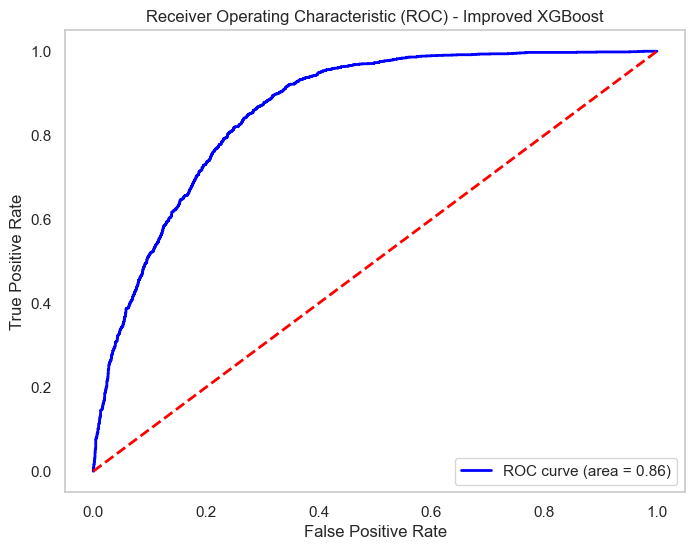

In [35]:
# Predict probabilities for the positive class using the best XGBoost model
best_xgb_probs = best_xgb.predict_proba(X_test_scaled_df)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, best_xgb_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Improved XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Predictions on test df

In [36]:
# Feature engineering on test set
testdf['BMI'] = testdf['weight(kg)'] / (testdf['height(cm)']/100)**2
testdf['eyesight_avg'] = (testdf['eyesight(left)'] + testdf['eyesight(right)']) / 2
testdf['liver_ratio'] = testdf['AST'] / testdf['ALT']
testdf['cholesterol_lvl'] = testdf['HDL'] + testdf['LDL']
#Dropping id column from feature set as before
X_test_df = testdf.drop(['id'], axis=1)  
# Transform the test data using the existing scaler
X_test_scaled_df = scaler.transform(X_test_df)
print(len(X_test_scaled_df))



106171


In [38]:
#Predictions on the test set with XGBoost (best model)
xgb_pred = best_xgb.predict(X_test_scaled_df)
testdf['smoking'] = xgb_pred
#file path
pred_path = "/Users/ananya/Desktop/RPI ML/Project/Data/submissions.csv"
#Exporting to csv file 
testdf[['id', 'smoking']].to_csv(pred_path, index=False)

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=200, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   6.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   5.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, 

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d